<a href="https://colab.research.google.com/github/tamaranindt26/HealthCostPrediction-LinearRegression/blob/main/Linear_Regression_Health_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, metrics

# Import Dataset

In [ ]:
import pandas as pd 
dataset = pd.read_csv('/content/drive/MyDrive/insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Cek Missing Value

In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Mengubah data menjadi numerik

In [ ]:
X = dataset[['age', 'sex', 'bmi','children', 'smoker', 'region']]
y = dataset['charges']


In [ ]:
#Check the unique values in the extracted columns:
print (pd.unique(X['sex']))
print (pd.unique(X['smoker']))
print (pd.unique(X['region']))

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['region'] = le.fit_transform(X['region'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


# Memisahkan Data training dan data test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

# Membuat model

In [ ]:
# create linear regression object
reg = linear_model.LinearRegression()
# train the model using the training sets
reg.fit(X_train, y_train)
 
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,252.078308
sex,-270.185095
bmi,316.554730
children,364.492558
smoker,24069.874382
region,-259.231264


# Melakukan Prediksi

In [ ]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
559,1646.42970,4432.512398
1087,11353.22760,12748.434735
1020,8798.59300,12445.891184
460,10381.47870,13447.503350
802,2103.08000,594.679965
...,...,...
1192,13019.16105,14165.076254
628,11365.95200,14526.994071
1098,23045.56616,11806.950658
1038,2250.83520,3342.889631


# Menguji Akurasi

In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Variance score: 0.7338069544102044
Mean Absolute Error: 4019.6367067852752
Mean Squared Error: 35807072.80613922
Root Mean Squared Error: 5983.901136059922


# Visualisasi prediksi

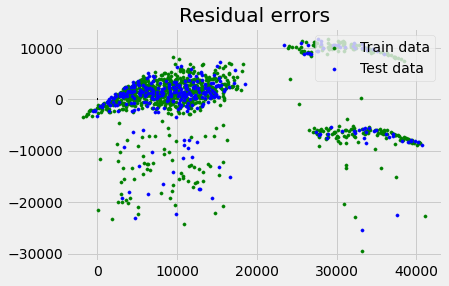

In [ ]:
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()